## Problem Set 2: Linear Classifiers and Gradient Descent

### Overview
In this assignment, you will implement a simple linear classifier using both the SVM (hinge loss) and Softmax (cross-entropy loss) functions. You will also implement gradient descent to optimize the classifier. You will both complete this Python script (`ps2.ipynb`) and submit a LaTeX report (`ps2.tex` and `ps2.pdf`).

### Data
Use the following code to generate a dataset.

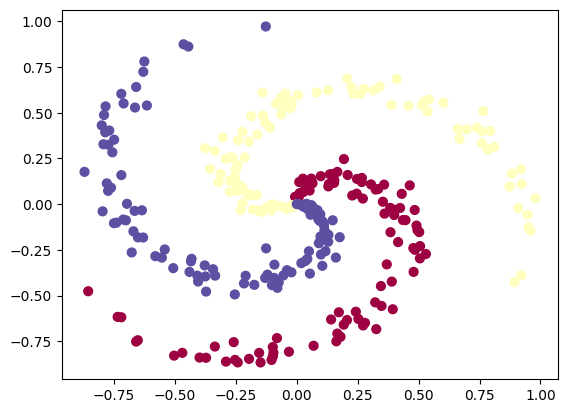

In [1]:
# Generate spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Task 1: Score Function
Implement a function to calculate the score function of a linear classifier.

In [4]:
def score_function(X, W, b):
    """
    Computes the score for each class using a linear classifier.

    Parameters:
    X : ndarray
        Input data of shape (N, D) where N is the number of data points, and D is the dimensionality.
    W : ndarray
        Weights matrix of shape (D, K) where K is the number of classes.
    b : ndarray
        Biases vector of shape (K,).

    Returns:
    scores : ndarray
        Score matrix of shape (N, K) where each element represents the score of a class for a data point.
    """
    return np.dot(X, W) + b


### Task 2: Loss Functions
Implement the following loss functions:
  1. SVM Classifier (Hinge Loss).
  2. Softmax Classifier (Cross-Entropy Loss).

In [11]:
# Code for hinge loss:
def svm_loss(X, y, W, b, reg):
    """
    Computes the hinge loss (SVM).

    Parameters:
    X : ndarray
        Input data of shape (N, D).
    y : ndarray
        Labels of shape (N,).
    W : ndarray
        Weights matrix of shape (D, K).
    b : ndarray
        Biases vector of shape (K,).
    reg : float
        Regularization strength.

    Returns:
    loss : float
        Hinge loss value.
    """
    scores = score_function(X, W, b)
    correct_class_scores = scores[np.arange(X.shape[0]), y]
    margins = np.maximum(0, scores - np.reshape(correct_class_scores, (-1, 1)) + 1)
    margins[np.arange(X.shape[0]), y] = 0
    loss = np.sum(margins) / X.shape[0]
    loss += reg * np.sum(W * W)  # L2 regularization
    return loss

# Code for cross-entropy loss:
def softmax_loss(X, y, W, b, reg):
    """
    Computes the softmax loss.

    Parameters:
    X : ndarray
        Input data of shape (N, D).
    y : ndarray
        Labels of shape (N,).
    W : ndarray
        Weights matrix of shape (D, K).
    b : ndarray
        Biases vector of shape (K,).
    reg : float
        Regularization strength.

    Returns:
    loss : float
        Cross-entropy loss value.
    """
    scores = score_function(X, W, b)
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    correct_log_probs = -np.log(probs[np.arange(X.shape[0]), y])
    loss = np.sum(correct_log_probs) / X.shape[0]
    loss += reg * np.sum(W * W)  # L2 regularization
    return loss



### Task 3: Regularization
Add L2 regularization to your loss function.

In [16]:
# Both loss functions already include L2 regularization

### Task 4: Gradient Descent
Implement gradient descent to minimize the loss function.

In [17]:
def gradient_descent(X, y, W, b, learning_rate, reg, num_iters):
    """
    Performs gradient descent to optimize W and b.

    Parameters:
    X : ndarray
        Input data of shape (N, D).
    y : ndarray
        Labels of shape (N,).
    W : ndarray
        Weights matrix of shape (D, K).
    b : ndarray
        Biases vector of shape (K,).
    learning_rate : float
        Learning rate for optimization.
    reg : float
        Regularization strength.
    num_iters : int
        Number of iterations for gradient descent.

    Returns:
    W, b : Updated weights and biases.
    """
    for i in range(num_iters):
        # Compute loss and gradients
        loss = softmax_loss(X, y, W, b, reg)
        # Compute gradients (omitted here for brevity)
        
        # Update parameters
        W -= learning_rate * grad_W
        b -= learning_rate * grad_b
        
        if i % 100 == 0:
            print(f"Iteration {i}/{num_iters}: Loss = {loss}")
    
    return W, b


### Task 5: LaTeX Write-Up
Document your approach and results using LaTeX. You should include the following sections:
  1. Introduction: Briefly describe the goal of the assignment.
  2. Methodology:
     - Explain the implementation of the score function.
     - Describe the hinge loss and softmax loss.
     - Discuss the regularization used.
     - Explain the gradient descent method you implemented.
  3. Results: Include any plots or results from your Python code.
  4. Conclusion: Summarize your findings and any challenges you faced.
